In [94]:
import numpy as np 
import pandas as pd 
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pal = sns.color_palette()

sns.set()

In [95]:
%cd "C:\Users\DELL\Downloads\Machine Learning\project"

C:\Users\DELL\Downloads\Machine Learning\project


In [96]:
df_test = pd.read_csv("test.csv")

In [97]:
df_train = pd.read_csv("train.csv")

In [98]:
df_train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


min: 72.11 max: 265.32 mean: 100.66931812782134 std:12.6778749695168
Count of values above 180: 1


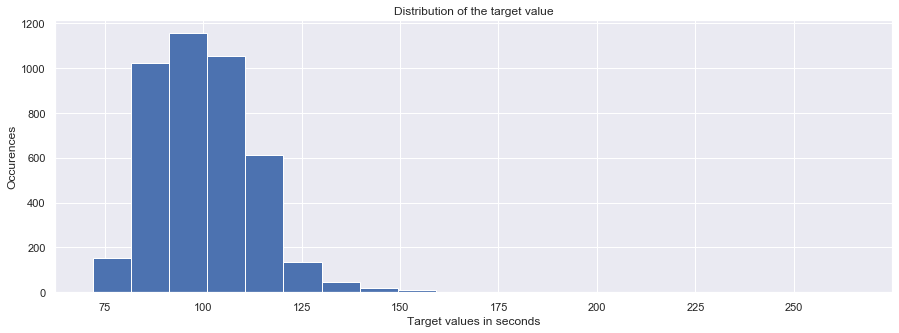

In [101]:
y_train = df_train['y'].values
plt.figure(figsize = (15,5))
plt.hist(y_train, bins = 20)
plt.xlabel("Target values in seconds")
plt.ylabel("Occurences")
plt.title("Distribution of the target value")

print('min: {} max: {} mean: {} std:{}'. format(min(y_train), max(y_train), y_train.mean(), y_train.std()))
print('Count of values above 180: {}'.format(np.sum(y_train > 200)))

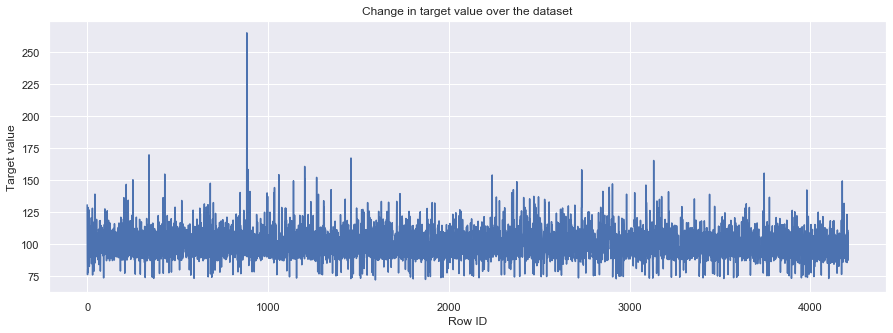

In [102]:
plt.figure(figsize=(15, 5))
plt.plot(y_train)
plt.xlabel('Row ID')
plt.ylabel('Target value')
plt.title('Change in target value over the dataset')
plt.show()

Text(0.5, 1.0, 'Change in target value over the dataset(first 100 samples)')

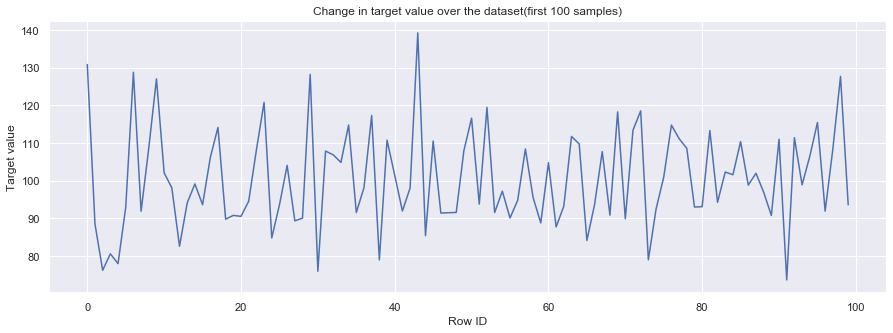

In [103]:
plt.figure(figsize=(15,5))
plt.plot(y_train[:100])
plt.xlabel("Row ID")
plt.ylabel("Target value")
plt.title("Change in target value over the dataset(first 100 samples)")

# Feature analysis


In [104]:
dtype_df = df_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count')

,Count
Column Type,
int64,369
float64,1
object,8


In [105]:
cols = [c for c in df_train.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print("features types:")
df_train[cols].dtypes.value_counts()

Number of features: 376
features types:


int64     368
object      8
dtype: int64

In [113]:
counts = [[], [], []]
for c in cols:
    typ = df_train[c].dtype
    uniq = len(np.unique(df_train[c]))
    if uniq == 1: counts[0].append(c)
    elif  uniq == 2 and typ == np.int64: counts[1].append(c)
    else : counts[2].append(c)
            
print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))
print('Constant features:', counts[0])
print('Categorical features:', counts[2])         

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


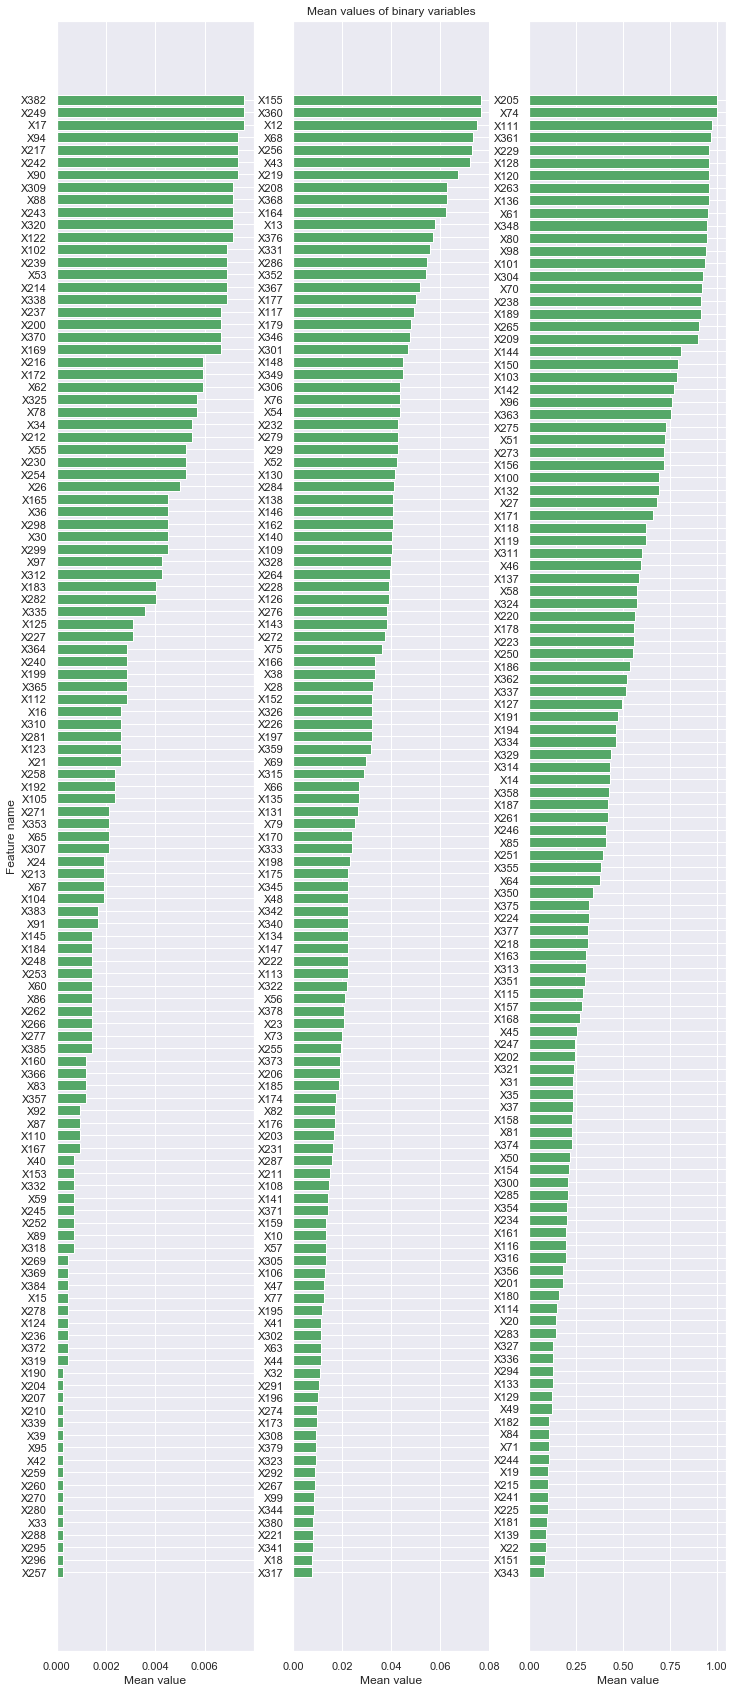

In [114]:
binary_means = [np.mean(df_train[c]) for c in counts[1]]
binary_names = np.array(counts[1])[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, color=pal[2])
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

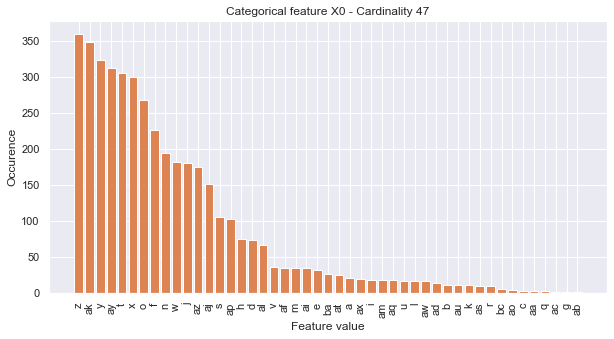

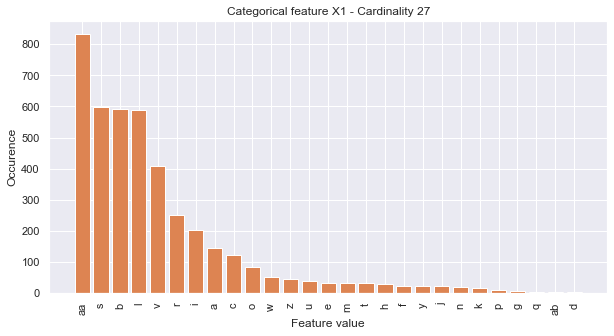

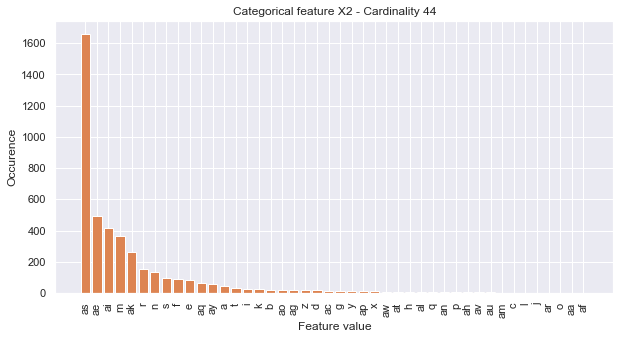

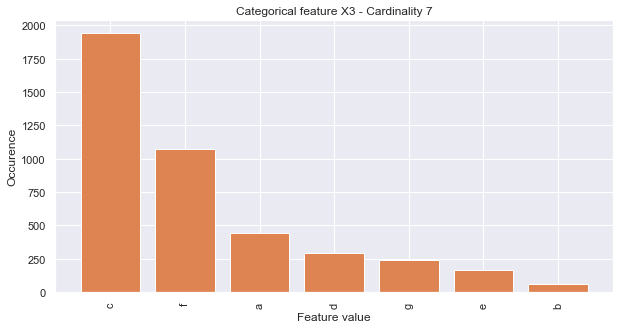

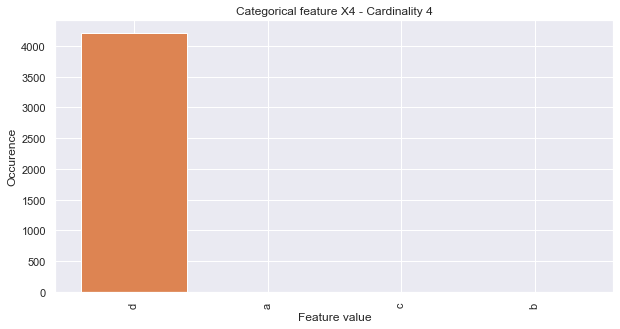

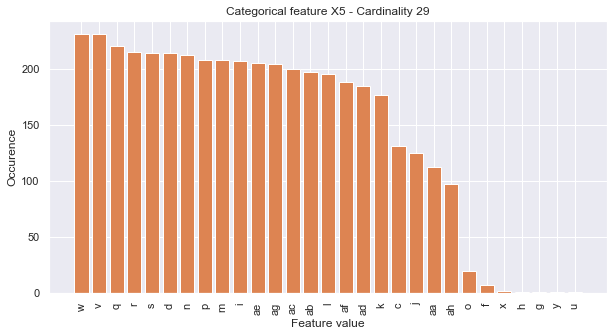

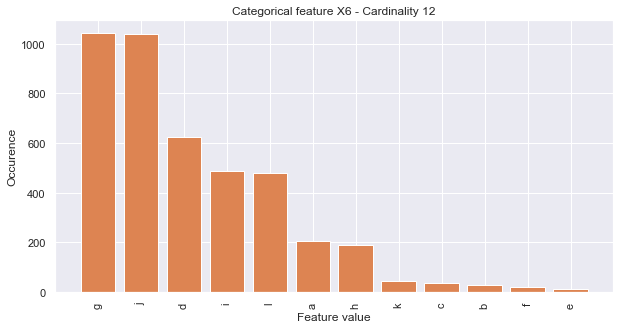

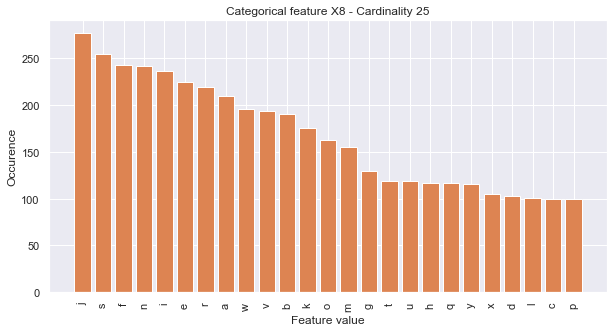

In [116]:
for c in counts[2]:
    value_counts = df_train[c].value_counts()
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title('Categorical feature {} - Cardinality {}'. format(c, len(np.unique(df_train[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurence')
    plt.bar(range(len(value_counts)),value_counts.values, color=pal[1])
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

In [62]:
df_test = pd.read_csv('test.csv')

usable_columns = list(set(df_train.columns) - set(['ID', 'y']))

y_train = df_train['y'].values
id_test = df_test['ID'].values

x_train = df_train[usable_columns]
x_test = df_test[usable_columns]

for column in usable_columns:
    cardinality = len(np.unique(x_train[column]))
    if cardinality == 1:
            x_train.drop(column,axis=1)
            x_test.drop(column,axis=1)
    if cardinality >2:
        mapper = lambda x: sum([ord(digit) for digit in x])
        x_train[column] = x_train[column].apply(mapper)
        x_test[column] = x_test[column].apply(mapper)
        
x_train.head()        
        

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,X77,X251,X339,X110,X367,X293,X278,X29,X320,X346,...,X46,X268,X265,X122,X241,X87,X45,X328,X81,X108
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train,y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

[11:09:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.7611	valid-rmse:99.78	train-r2:-62.166	valid-r2:-52.7166
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:80.849	valid-rmse:81.7405	train-r2:-41.3312	valid-r2:-35.0493
[20]	train-rmse:66.2375	valid-rmse:67.0388	train-r2:-27.4131	valid-r2:-23.2479
[30]	train-rmse:54.3298	valid-rmse:55.0753	train-r2:-18.1156	valid-r2:-15.3657
[40]	train-rmse:44.6393	valid-rmse:45.36	train-r2:-11.9046	valid-r2:-10.1012
[50]	train-rmse:36.7694	valid-rmse:37.4967	train-r2:-7.75558	valid-r2:-6.58592
[60]	train-rmse:30.3966	valid-rmse:31.161	train-r2:-4.98359	valid-r2:-4.23895
[70]	train-rmse:25.2572	valid-rmse:26.0847	train-r2:-3.13124	valid-r2:-2.67107
[80]	train-rmse:21.1363	valid-rmse:22.0549	train-r2:-1.89314	valid-r2:-

In [44]:
p_test = clf.predict(d_test)
predict = pd.DataFrame()
predict['ID'] = id_test
predict['y'] = p_test

In [45]:
predict.head()

,ID,y
0,1,90.744301
1,2,109.837311
2,3,91.097061
3,4,77.475166
4,5,111.142700
